In [1]:
import numpy as np
import pandas as pd
import os
import re
from IPython.display import display,HTML
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = {}
for x in os.listdir('DATA/365_database'):
    tabel = re.findall(r'365_(.*).csv',x)[0]
    df[tabel] = pd.read_csv(f'DATA/365_database/{x}')
    print(f'created.. {tabel}')

created.. course_info
created.. course_ratings
created.. exam_info
created.. quiz_info
created.. student_engagement
created.. student_exams
created.. student_hub_questions
created.. student_info
created.. student_learning
created.. student_purchases
created.. student_quizzes


In [3]:
for k,v in df.items():
    display(HTML(f'<h1>{k}</h1>'))
    display(v.head())

,course_id,course_title
0,2,Introduction to Tableau
1,3,The Complete Data Visualization Course with Py...
2,4,Introduction to R Programming
3,5,Data Preprocessing with NumPy
4,7,Introduction to Data and Data Science


,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


,exam_id,exam_category,exam_duration
0,118,2,14
1,119,2,14
2,120,1,26
3,276,2,15
4,277,2,15


,quiz_id,question_id,answer_id,answer_correct
0,1,1,1,n
1,1,1,2,y
2,1,1,3,n
3,1,1,4,n
4,2,2,5,n


,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27


,exam_attempt_id,student_id,exam_id,exam_result,exam_completion_time,date_exam_completed
0,173311,258803,475,83,5.17,2022-01-01
1,173332,258815,380,0,10.02,2022-01-01
2,173333,258815,380,67,7.93,2022-01-01
3,173335,258815,380,100,0.60,2022-01-01
4,173336,258815,380,0,10.02,2022-01-01


,hub_question_id,student_id,date_question_asked
0,7619,258803,2022-01-03
1,7630,258803,2022-01-04
2,7662,259342,2022-01-05
3,7667,259391,2022-01-05
4,7668,259174,2022-01-05


,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


,student_id,quiz_id,question_id,answer_id
0,258803,537,796,3139.0
1,258803,159,793,3127.0
2,258803,159,794,3132.0
3,258803,160,181,710.0
4,258803,161,184,723.0


* Minutes watched on the platform (Decimal)
* Number of days in which a student was engaged with the platform (Integer)
* Engaged with quizzes (Boolean)
* Engaged with exams (Boolean)
* Engaged with the Q&A hub (Boolean)

In [4]:
df1 = df['student_purchases'].groupby('student_id')[['date_purchased']].min().sort_values(by=['date_purchased'])
time_diff = df['student_info'].set_index('student_id').join(df1,how='right')
time_diff['time_diff'] = (pd.to_datetime(time_diff['date_purchased']) - pd.to_datetime(time_diff['date_registered'])).dt.days
time_diff

,student_country,date_registered,date_purchased,time_diff
student_id,,,,
258800,CA,2022-01-01,2022-01-01,0
258908,US,2022-01-01,2022-01-01,0
258878,CA,2022-01-01,2022-01-01,0
258865,CA,2022-01-01,2022-01-01,0
258862,NL,2022-01-01,2022-01-01,0
...,...,...,...,...
279735,IN,2022-06-29,2022-10-20,113
291088,GB,2022-09-17,2022-10-20,33
289049,PK,2022-09-01,2022-10-20,49


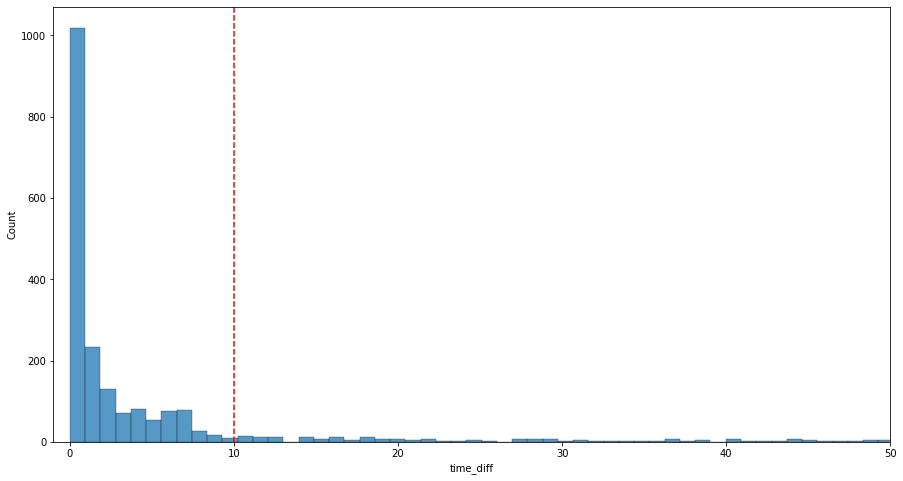

In [5]:
plt.figure(figsize=(15,8))
sns.histplot(data=time_diff, x="time_diff")
plt.axvline(time_diff['time_diff'].mean(),color='r',linestyle='--')
plt.xlim([-1,50])
plt.show()

In [6]:
time_diff['time_diff'].mean()

9.98032786885246

In [7]:
(time_diff['time_diff'] <= 10).sum()

1796

In [8]:
time_diff[time_diff['time_diff'] <= 10].index

Int64Index([258800, 258908, 258878, 258865, 258862, 258883, 258803, 258916,
            259039, 258984,
            ...
            295214, 295106, 295256, 295273, 295355, 293976, 294208, 294694,
            295497, 295506],
           dtype='int64', name='student_id', length=1796)

## engagement for the first 10 days

In [9]:
dd = df['student_engagement'].set_index('student_id').join(df['student_info'].set_index('student_id')).reset_index()
dd = dd[pd.to_datetime(dd['date_engaged']) <= (pd.to_datetime(dd['date_registered']) + pd.Timedelta('10 day'))]
dd = dd.groupby(['student_id'])[['engagement_quizzes','engagement_exams','engagement_lessons']].sum()
dd

,engagement_quizzes,engagement_exams,engagement_lessons
student_id,,,
258798,0,0,1
258800,5,3,8
258803,5,3,9
258804,1,0,1
258807,0,0,1
...,...,...,...
295509,0,0,1
295510,0,0,1
295511,1,0,1


## hub for the first 10 days

In [19]:
hh = df['student_hub_questions'].set_index('student_id').join(df['student_info'].set_index('student_id')).reset_index()
hh = hh[pd.to_datetime(hh['date_question_asked']) <= (pd.to_datetime(hh['date_registered']) + pd.Timedelta('10 day'))]
hh = hh.groupby(['student_id'])[['hub_question_id']].count().sort_values(by=['hub_question_id']).rename(columns={'hub_question_id':'hub_question'})
hh

,hub_question
student_id,
294330,1
287861,1
287993,1
288378,1
288446,1
...,...
275129,4
284907,4
264076,4


## mins watched for the first 10 days

In [11]:
mm = df['student_learning'].set_index('student_id').join(df['student_info'].set_index('student_id')).reset_index()
mm = mm[pd.to_datetime(mm['date_watched']) <= (pd.to_datetime(mm['date_registered']) + pd.Timedelta('10 day'))]
mm = mm.groupby(['student_id'])[['minutes_watched']].sum().sort_values(by=['minutes_watched'])
mm

,minutes_watched
student_id,
272744,0.0
295513,0.1
284605,0.1
284667,0.1
284707,0.1
...,...
291626,1405.5
285537,1510.1
284923,1783.7


## subscribed after the first 10 days

In [16]:
ss = df['student_purchases'].set_index('student_id').join(df['student_info'].set_index('student_id')).reset_index()
ss = ss[pd.to_datetime(ss['date_purchased']) <= (pd.to_datetime(ss['date_registered']) + pd.Timedelta('10 day'))]
ss = ss['student_id'].value_counts()
ss

284492    2
282929    2
263672    2
267114    2
277821    1
         ..
273068    1
278633    1
268978    1
271029    1
282626    1
Name: student_id, Length: 1796, dtype: int64

In [26]:
main = df['student_info'][['student_id','student_country']].set_index('student_id').join(mm).join(hh).join(dd).join(ss).fillna(0).rename(columns={'student_id':'subscribed'})
main['subscribed'] = (main['subscribed'] > 0).astype(int)
main

,student_country,minutes_watched,hub_question,engagement_quizzes,engagement_exams,engagement_lessons,subscribed
student_id,,,,,,,
258798,IN,0.3,0.0,0.0,0.0,1.0,0
258799,CO,0.0,0.0,0.0,0.0,0.0,0
258800,CA,234.0,0.0,5.0,3.0,8.0,1
258801,IN,0.0,0.0,0.0,0.0,0.0,0
258802,US,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
295511,CM,7.8,0.0,1.0,0.0,1.0,0
295512,CA,10.4,0.0,1.0,0.0,1.0,0
295513,SA,0.1,0.0,0.0,0.0,1.0,0


In [51]:
main.reset_index().to_excel('DATA/ml.xlsx',index=False)

In [50]:
main.join(pd.get_dummies(main['student_country'], prefix='country'))

,student_country,minutes_watched,hub_question,engagement_quizzes,engagement_exams,engagement_lessons,subscribed,country_0,country_AD,country_AE,...,country_VC,country_VE,country_VI,country_VN,country_VU,country_XK,country_YE,country_ZA,country_ZM,country_ZW
student_id,,,,,,,,,,,,,,,,,,,,,
258798,IN,0.3,0.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258799,CO,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258800,CA,234.0,0.0,5.0,3.0,8.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258801,IN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
258802,US,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295511,CM,7.8,0.0,1.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295512,CA,10.4,0.0,1.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295513,SA,0.1,0.0,0.0,0.0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
main[main['subscribed'] == 1]

,student_country,minutes_watched,hub_question,engagement_quizzes,engagement_exams,engagement_lessons,subscribed
student_id,,,,,,,
258800,CA,234.0,0.0,5.0,3.0,8.0,1
258803,US,395.6,2.0,5.0,3.0,9.0,1
258818,IN,218.6,1.0,5.0,1.0,7.0,1
258822,IN,118.3,0.0,2.0,3.0,3.0,1
258862,NL,159.5,0.0,4.0,2.0,4.0,1
...,...,...,...,...,...,...,...
295256,CA,314.8,0.0,2.0,2.0,2.0,1
295273,TR,0.0,0.0,0.0,0.0,0.0,1
295355,US,1.3,0.0,0.0,0.0,1.0,1


In [45]:
main[main[['minutes_watched', 'hub_question','engagement_quizzes', 'engagement_exams', 'engagement_lessons']].sum(axis=1) != 0]

,student_country,minutes_watched,hub_question,engagement_quizzes,engagement_exams,engagement_lessons,subscribed
student_id,,,,,,,
258798,IN,0.3,0.0,0.0,0.0,1.0,0
258800,CA,234.0,0.0,5.0,3.0,8.0,1
258803,US,395.6,2.0,5.0,3.0,9.0,1
258804,BD,14.2,0.0,1.0,0.0,1.0,0
258807,US,1.8,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
295509,EG,0.8,0.0,0.0,0.0,1.0,0
295510,IN,0.1,0.0,0.0,0.0,1.0,0
295511,CM,7.8,0.0,1.0,0.0,1.0,0


In [47]:
main.drop_duplicates()['subscribed'].value_counts()

0    9690
1    1622
Name: subscribed, dtype: int64

In [21]:
35230 - main.isna().sum()

student_country       35217
minutes_watched       17144
hub_question            107
engagement_quizzes    17314
engagement_exams      17314
engagement_lessons    17314
student_id             1796
dtype: int64